<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Aprendizaje Automático No Supervisado</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el quinto y último práctico del proyecto, correspondiente a la materia Aprendizaje Automático No Supervisado. El objetivo consiste en aplicar distintas técnicas de análisis exploratorio de datos (EDA) al dataset, de modo de encontrar patrones sistematizables. Es decir que, a los fines de este práctico, por un momento nos olvidaremos de nuestro problema original de clasificación múltiple y de que tenemos datos etiqutados con sus respectivas clases.

Luego, una vez aplicadas las técnicas de aprendizaje no supervisado y del cálculo de las métricas pertinentes, podremos recurrir a las etiquetas de clases con el fin de contrastar los resultados obtenidos.

A pesar de que no serán utilizadas las etiquetas en una primera instancia, será importante evaluar el desbalance de clases y qué decisiones tomarán al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [250]:
!pip install factor_analyzer==0.2.3

  Found existing installation: factor-analyzer 0.3.2
    Uninstalling factor-analyzer-0.3.2:
      Successfully uninstalled factor-analyzer-0.3.2
You should consider upgrading via the 'pip install --upgrade pip' command.


In [128]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import utils

# import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.decomposition.pca import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

import plotly.express as px

from factor_analyzer import FactorAnalyzer


random_state = 0
np.random.seed(0)  # Para mayor determinismo

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import cross_val_score

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)
pd.set_option('max_colwidth', 251)

## Consigna para Aprendizaje Automático No Supervisado

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes. A continuación se detallan los pasos a seguir para el preprocesamiento de los datos.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el segundo práctico.

#### 3. Análisis del Balance de Clases

En una primera instancia, podemos dejar que los algoritmos identifiquen patrones, sin necesidad de preocuparnos por el balance de clases.

En una etapa posterior, y aprovechando que tenemos las etiquetas, aplicarán los mismos algoritmos pero considerando el desbalance de clases en el dataset. Para ello, usar el parámetro `sample_weight` de `k_means`. Obtener conclusiones entre ambos resultados.

#### 4. Multicolinealidad Exacta y Variables Dummies

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada.

Dadas las características de nuestro dataset, nos encontramos con múltiples variables dummies. Analizar en qué casos resulta pertinente descartar la k-ésima dummie de cada categoría. ¿Qué creen que ocurrirá con estas variables al aplicar PCA?

#### 5. Clasificación a Nivel Hogar o a Nivel Individuo

A partir de análisis previos, sabemos que en nuestro problema la clasificación corresponde al hogar (y no al individuo). Es decir, cada hogar tendrá una única etiqueta. Por lo tanto, para aplicar los modelos, se presentan las siguientes opciones:

a. Quedarse sólo con los individuos jefes o jefas de hogar, y de éstos, con todas las variables asociadas que se repiten para el hogar. Asimismo, crear variables con medidas resumen para todas las variables que no se repitan por hogar.

b. Mantener el dataset a nivel individuo.

Del siguiente punto en adelante, **deberán resolver para ambos conjuntos de datos**. Posteriormente, podremos determinar cuál es el más apropiado para aplicar las técnicas de clasificación no supervisada.

#### 6. Creación de Nuevos Atributos

En esta etapa, pueden adicionar atributos calculados a partir de los datos preexistentes, que crean que son pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable `Target`. Por ejemplo, una variable que represente los aparatos tecnológicos, la tasa de dependencia al cuadrado, años de escolaridad al cuadrado, tasa de dependencia por edad de la persona jefa de hogar o por la edad promedio del hogar, el logaritmo natural de la tasa de dependencia, entre otras.

#### 7. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que los algoritmos de clasificación no supervisada lo requieren. Aplicar al dataset la normalización de atributos que consideren adecuada.

#### 8. Mezca Aleatória y División en Train/Test

Finalmente, es recomendable que mezclen los datos aleatoriamente, dado que la inicialización influye en los resultados del modelo que se propone que implementen.

Respecto a la división en Train/Test, dado que se trata de un algoritmo de aprendizaje automático no supervisado, pueden omitir esta división, ya que estamos buscando patrones ocultos en los datos que reflejen las causas latentes.

---

A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Aprendizaje Automático No Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar, por un lado, una técnica de reducción de dimensionalidad para representar los datos y, por el otro, una técnica de clusterización.

#### 1. Descomposivión de Variables: Principal Component Analysis

Si bien la mayoría de nuestros atributos se tratan de variables binarias y PCA no es tan apropiado para este tipo de datasets, puede aplicarse esta técnica y ver que resulta.
A partir del análisis y la visualización de los datasets transformados por PCA, obtener conclusiones.

Adicionalmente, existe una técnica llamada Factor Analysis que puede ser más apropiada para este caso. Aplicarla y obtener conclusiones. Comparar con los resultados obtenidos previamente.

#### 2. K-Means Clustering

Aplicar K-Means tanto a los dataset originales como a los datasets transformados a partir de cualquiera de las técnicas anteriores.

Explorar distintas soluciones de clustering con diferentes parámetros, como iteraciones, número de clusters o métricas de distancia, y compararlas. Finalmente, para el modelo seleccionado:

- Calcular las métricas pertinentes sobre los clusters resultantes.
- Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?
- Agregar a los dataset originales el cluster resultante de los modelos.
- Graficar diferentes variables de interés por cluster y por clase, y compararlos.
- Tomar ejemplos aleatorios y pensar por qué están en un cluster y no en otro.
- Calcular los centroides y tratar de mostrar qué tiene cada cluster cerca de su centroide. Obtener conclusiones.
- Contrastar la clasificación en clusters con las etiquetas de clases, tanto gráficamente como analítica. Si utilizan 4 clusters, elaborar una matriz de confusión.

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y las técnicas implementadas, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

Además, deberán agregar al PPT la síntesis de las principales conclusiones de éste práctico.

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [4]:
# Cargamos el dataset original en una variable
url_data_train = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
_ds = pd.read_csv(url_data_train)
_ds.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
3     0     2     2     1     1     2     1     3     4       4       4   
4     0     2     2     1     1     2     1     3     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
3         9      1.0       4            1            0          0         0   
4        11      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0

In [5]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo a mano
# Si hay nueva metadata, cargarla posteriormente
url_fields_info = 'https://raw.githubusercontent.com/solujan/DiploDatos2019/master/ProyectoPobrezaCostaRica/Dataset%20Fields.csv'
_data_fields = pd.read_csv(url_fields_info, sep=';')
_data_fields

Variable_name  \
0               v2a1   
1             hacdor   
2              rooms   
3             hacapo   
4               v14a   
5             refrig   
6               v18q   
7              v18q1   
8               r4h1   
9               r4h2   
10              r4h3   
11              r4m1   
12              r4m2   
13              r4m3   
14              r4t1   
15              r4t2   
16              r4t3   
17            tamhog   
18            tamviv   
19          escolari   
20           rez_esc   
21            hhsize   
22       paredblolad   
23       paredzocalo   
24         paredpreb   
25          pareddes   
26          paredmad   
27         paredzinc   
28       paredfibras   
29        paredother   
30        pisomoscer   
31       pisocemento   
32         pisoother   
33         pisonatur   
34       pisonotiene   
35        pisomadera   
36         techozinc   
37    techoentrepiso   
38         techocane   
39         techootro   
40         cielorazo   
41   abastaguadentro   
42    abastaguafuera   
43       abastaguano   
44            public   
45           planpri   
46            noelec   
47           coopele   
48        sanitario1   
49        sanitario2   
50        sanitario3   
51        sanitario5   
52        sanitario6   
53     energcocinar1   
54     energcocinar2   
55     energcocinar3   
56     energcocinar4   
57         elimbasu1   
58         elimbasu2   
59         elimbasu3   
60         elimbasu4   
61         elimbasu5   
62         elimbasu6   
63           epared1   
64           epared2   
65           epared3   
66           etecho1   
67           etecho2   
68           etecho3   
69             eviv1   
70             eviv2   
71             eviv3   
72               dis   
73              male   
74            female   
75      estadocivil1   
76      estadocivil2   
77      estadocivil3   
78      estadocivil4   
79      estadocivil5   
80      estadocivil6   
81      estadocivil7   
82       parentesco1   
83       parentesco2   
84       parentesco3   
85       parentesco4   
86       parentesco5   
87       parentesco6   
88       parentesco7   
89       parentesco8   
90       parentesco9   
91      parentesco10   
92      parentesco11   
93      parentesco12   
94           idhogar   
95         hogar_nin   
96        hogar_adul   
97       hogar_mayor   
98       hogar_total   
99        dependency   
100           edjefe   
101           edjefa   
102         meaneduc   
103       instlevel1   
104       instlevel2   
105       instlevel3   
106       instlevel4   
107       instlevel5   
108       instlevel6   
109       instlevel7   
110       instlevel8   
111       instlevel9   
112         bedrooms   
113     overcrowding   
114        tipovivi1   
115        tipovivi2   
116        tipovivi3   
117        tipovivi4   
118        tipovivi5   
119         computer   
120       television   
121      mobilephone   
122     qmobilephone   
123           lugar1   
124           lugar2   
125           lugar3   
126           lugar4   
127           lugar5   
128           lugar6   
129            area1   
130            area2   
131              age   
132      SQBescolari   
133           SQBage   
134   SQBhogar_total   
135        SQBedjefe   
136     SQBhogar_nin   
137  SQBovercrowding   
138    SQBdependency   
139        SQBmeaned   
140            agesq   

                                                                                                                                        Variable_description  
0                                                                                                                                       Monthly rent payment  
1                                                                                                                                =1 Overcrowding by bedrooms  
2                                                                                                                        

Recuerden que la variable `Target` constituye nuestro objetivo original de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habita cada individuo, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

### 2. Aplicar Script de Curación

El siguiente paso implica aplicar el script que resultó del práctico anterior. También pueden adicionar campos calculados en base a otros atributos, según lo consideren pertinente.

In [6]:
from clean import clean
ds = clean(_ds)

Columnas eliminadas:  ['SQBescolari' 'SQBage' 'SQBhogar_total' 'SQBedjefe' 'SQBhogar_nin'
 'SQBovercrowding' 'SQBdependency' 'SQBmeaned' 'agesq']
Columnas eliminadas: edjefe, edjefa, dependency, meaneduc, rez_esc, hhsize, r4t1, r4t2, r4t3,r4m3, r4h3, hogar_total, elimbasu5
Cantidad de familias sin caracteristicas comunes:  19
Cantidad de familias sin caracteristicas comunes:  4


/home/mariano/Documentos/ai/MentoriaDiploDatos/clean.py:151: FutureWarning:

`item` has been deprecated and will be removed in a future version



Total Features:  2 objetos + 136 numerical = 138 features


In [7]:
ds.head()

Id   monthly_rent  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0  ID_279628684  190000.000000       0      3       0     1       1     0   
1  ID_f29eb3ddd  135000.000000       0      4       0     1       1     1   
2  ID_68de51c94  328862.222222       0      8       0     1       1     0   
3  ID_d671db89c  180000.000000       0      5       0     1       1     1   
4  ID_d56d6f5f5  180000.000000       0      5       0     1       1     1   

   v18q1  r4h1  r4h2  r4m1  r4m2  tamhog  tamviv  escolari  paredblolad  \
0    0.0     0     1     0     0       1       1        10            1   
1    1.0     0     1     0     0       1       1        12            0   
2    0.0     0     0     0     1       1       1        11            0   
3    1.0     0     2     1     1       4       4         9            1   
4    1.0     0     2     1     1       4       4        11            1   

   paredzocalo  paredpreb  pareddes  paredmad  paredzinc  paredfibras  \
0            0          0         0         0          0            0   
1            0          0         0         1          0            0   
2            0          0         0         1          0            0   
3            0          0         0         0          0            0   
4            0          0         0         0          0            0   

   paredother  pisomoscer  pisocemento  pisoother  pisonatur  pisonotiene  \
0           0           1            0          0          0            0   
1           0           0            0          0          0            0   
2           0           1            0          0          0            0   
3           0           1            0          0          0            0   
4           0           1            0          0          0            0   

   pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
0           0          0               1          0          0          1   
1           1          1               0          0          0          1   
2           0          1               0          0          0          1   
3           0          1               0          0          0          1   
4           0          1               0          0          0          1   

   abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  \
0                1               0            0       1        0       0   
1                1               0            0       1        0       0   
2                1               0            0       1        0       0   
3                1               0            0       1        0       0   
4                1               0            0       1        0       0   

   coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  \
0        0           0           1           0           0           0   
1        0           0           1           0           0           0   
2        0           0           1           0           0           0   
3        0           0           1           0           0           0   
4        0           0           1           0           0           0   

   energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  \
0              0              0              1              0          1   
1              0              1              0              0          1   
2              0              1              0              0          1   
3              0              1              0              0          1   
4              0              1              0              0          1   

   elimbasu2  elimbasu3  elimbasu4  elimbasu6  epared1  epared2  epared3  \
0          0          0          0          0        0        1        0   
1          0          0          0          0        0        1        0   
2          0          0          0          0        0        1        0   
3          0          0          0          0        0        0        

### 3. Análisis de Balance de Clases

Evaluar el balance de clases. Dejar plasmadas las decisiones que tomen al respecto.

In [8]:
df_upsampled = utils.df_upsample(ds, "Target")
df_upsampled.Target.value_counts()

4    5953
3    5953
2    5953
1    5953
Name: Target, dtype: int64

In [9]:
df_downsampled = utils.df_downsample(ds, "Target")
df_downsampled.Target.value_counts()

3    755
1    755
4    755
2    755
Name: Target, dtype: int64

In [10]:
ds=df_upsampled

### 4. Multicolinealidad Exacta y Variables Dummies

Decisiones respecto a las variables con multicolinealidad perfecta.

### 5. Clasificación a Nivel Hogar o a Nivel Individuo

En este punto, crear un nuevo dataset, `_ds_hogar`, manteniendo únicamente los individuos jefe de hogar (```parentesco1 == 1```) y los atributos que se repitan por hogar. Para aquellos atributos individuales, crear medidas sintéticas por hogar relevantes (suma, promedio simple, promedio ponderado, máximo, mínimo, etc.).

Por ejemplo, para la escolaridad, mantendría la de la persona jefa de hogar y crearía otra (u otras) que indiquen la escolaridad promedio o la escolaridad promedio por adulto.

In [11]:
_ds_individuo = ds
_ds_hogar = ds[ds['parentesco1'] == 1]
_ds_hogar.head()

Id   monthly_rent  hacdor  rooms  hacapo  v14a  refrig  v18q  \
102   ID_b3dd09090  299577.019608       0      6       0     1       1     1   
1235  ID_54d85a405   96000.000000       0      6       0     1       1     0   
2444  ID_c5631a80f  350000.000000       0      6       0     1       1     0   
6851  ID_65209b468  200000.000000       0      7       0     1       1     0   
39    ID_e73a7a162   80000.000000       0      4       0     1       1     0   

      v18q1  r4h1  r4h2  r4m1  r4m2  tamhog  tamviv  escolari  paredblolad  \
102     1.0     1     1     0     1       3       3        17            1   
1235    0.0     0     1     0     0       1       1        15            0   
2444    0.0     0     4     0     3       7       7         6            1   
6851    0.0     0     0     0     1       1       5         8            1   
39      0.0     0     2     0     1       3       3         8            0   

      paredzocalo  paredpreb  pareddes  paredmad  paredzinc  paredfibras  \
102             0          0         0         0          0            0   
1235            0          0         0         1          0            0   
2444            0          0         0         0          0            0   
6851            0          0         0         0          0            0   
39              0          0         0         1          0            0   

      paredother  pisomoscer  pisocemento  pisoother  pisonatur  pisonotiene  \
102            0           1            0          0          0            0   
1235           0           0            0          0          0            0   
2444           0           0            1          0          0            0   
6851           0           0            1          0          0            0   
39             0           0            0          0          0            0   

      pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
102            0          1               0          0          0          1   
1235           1          1               0          0          0          1   
2444           0          1               0          0          0          1   
6851           0          1               0          0          0          1   
39             1          1               0          0          0          1   

      abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  \
102                 1               0            0       1        0       0   
1235                1               0            0       1        0       0   
2444                1               0            0       1        0       0   
6851                0               1            0       1        0       0   
39                  1               0            0       1        0       0   

      coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  \
102         0           0           0           1           0           0   
1235        0           0           0           1           0           0   
2444        0           0           0           1           0           0   
6851        0           0           0           1           0           0   
39          0           0           0           1           0           0   

      energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  \
102               0              1              0              0          1   
1235              0              1              0              0          1   
2444              0              0              1              0          1   
6851              0              0              1              0          1   
39                0              0              1              0          1   

      elimbasu2  elimbasu3  elimbasu4  elimbasu6  epared1  epared2  epared3  \
102           0          0          0          0        0        0        1   
1235          0          0          0          0        0        1        0 

In [12]:
print(_ds_individuo.shape)
print(_ds_hogar.shape)

(23812, 138)
(7068, 138)



<div class="alert alert-block alert-warning">
<b>Recuerden:</b> Para aplicar clustering, sacar la variable `Target` de los datasets!
</div>

### 6. Normalización de Atributos

Aplicar al dataset la normalización de atributos que consideren adecuada.

In [13]:
def normalizar(df, scaler):
    fields = ['monthly_rent','hacdor','rooms','hogar_nin','hogar_adul','qmobilephone','hogar_mayor','v18q1','r4h1','r4h2','r4m1','r4m2','tamhog','tamviv','escolari','bedrooms','overcrowding','age']
    for col in fields:
        df[col] = scaler.fit_transform(df[[col]])
    return df


In [14]:
minmax = preprocessing.MinMaxScaler()

_ds_individuo = normalizar(_ds_individuo, minmax)
_ds_hogar = normalizar(_ds_hogar, minmax)

/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

### 7. Mezca Aleatória y División en Train/Test

Mezclar los datos aleatoriamente. Luego, si les parece necesario, dividir en Train/Test el dataset.

In [15]:
def train_test_split_shuffle(dataframe):
    y = dataframe.Target
    X = dataframe
    return train_test_split(X.drop(columns=["Id","idhogar", "Target"]), y, test_size=0.20, random_state=42, shuffle=True)

In [16]:
# Para mezclar aleatoriamente el dataset, utilizar el siguiente módulo:
X_train, X_test, y_train, y_test = train_test_split_shuffle(utils.drop_multicollinearity(_ds_individuo))

In [17]:
_ds_hogar.drop(columns=["Id","idhogar"], inplace=True)

/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
_ds_individuo.drop(columns=["Id","idhogar"], inplace=True)

In [19]:
#_ds_individuo.isna().sum()

_ds_individuo.replace([np.inf, -np.inf], 0, inplace=True)
X_train.replace([np.inf, -np.inf], 0, inplace=True)

## II. Aplicación de Modelos de Aprendizaje Automático No Supervisado

Utilizando los datos obtenidos, se aplicarán técnicas de reducción de dimensionalidad y el modelo K-Means de Clustering, tanto a `_ds_individuo` como a `_ds_hogar`.

### 1. Descomposivión de Variables: Principal Component Analysis

A continuación se aplicará la técnica de descomposición por Análisis de Componente Principal (PCA).

In [20]:
# Utilizar diferentes valores para el parámetro n_components

pca = PCA()
pca_ind = pca.fit(X_train,y_train)
#pca_hog = pca.fit(_ds_hogar)

In [21]:
# number of components
n_pcs= pca_ind.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca_ind.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X_train.keys()
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_columns_importance = pd.DataFrame(dic.items())
df_columns_importance

0                        1
0      PC0            rent_to_rooms
1      PC1                   SQBage
2      PC2                 edu_jefe
3      PC3                   edjefe
4      PC4           SQBhogar_total
5      PC5               tech_hogar
6      PC6                   edjefa
7      PC7               dependency
8      PC8           tech_individuo
9      PC9               pisomoscer
10    PC10                  no_work
11    PC11                  epared2
12    PC12            energcocinar3
13    PC13                tipovivi1
14    PC14                     male
15    PC15                     work
16    PC16                     male
17    PC17              paredblolad
18    PC18                paredpreb
19    PC19               sanitario3
20    PC20               instlevel2
21    PC21                 paredmad
22    PC22                tipovivi1
23    PC23               instlevel2
24    PC24              parentesco1
25    PC25               instlevel4
26    PC26           region_central
27    PC27               television
28    PC28               television
29    PC29                 paredmad
30    PC30             estadocivil2
31    PC31                    eviv2
32    PC32                  etecho2
33    PC33                cielorazo
34    PC34              paredzocalo
35    PC35               instlevel5
36    PC36              paredzocalo
37    PC37  region_huetar_atlantica
38    PC38                tipovivi3
39    PC39            female_weight
40    PC40  region_pacifico_central
41    PC41  region_pacifico_central
42    PC42          abastaguadentro
43    PC43              parentesco1
44    PC44         monthly_rent_log
45    PC45                   refrig
46    PC46                      dis
47    PC47                   refrig
48    PC48             estadocivil5
49    PC49                elimbasu2
50    PC50              pisonotiene
51    PC51                    eviv1
52    PC52                 computer
53    PC53                   hacdor
54    PC54             estadocivil1
55    PC55              mobilephone
56    PC56                tipovivi2
57    PC57                techozinc
58    PC58            energcocinar2
59    PC59             estadocivil6
60    PC60                  epared1
61    PC61             estadocivil4
62    PC62             estadocivil4
63    PC63            energcocinar2
64    PC64                 bedrooms
65    PC65               instlevel6
66    PC66                paredzinc
67    PC67                     r4h1
68    PC68              male_weight
69    PC69              male_weight
70    PC70              pisonotiene
71    PC71                paredzinc
72    PC72               instlevel7
73    PC73               instlevel7
74    PC74             estadocivil6
75    PC75  region_pacifico_central
76    PC76              parentesco9
77    PC77                     v14a
78    PC78                   hacapo
79    PC79                     r4m1
80    PC80                 pareddes
81    PC81              parentesco5
82    PC82                techocane
83    PC83              parentesco7
84    PC84         child_dependency
85    PC85         child_dependency
86    PC86             qmobilephone
87    PC87                   noelec
88    PC88            energcocinar1
89    PC89                     v14a
90    PC90             parentesco10
91    PC91                elimbasu4
92    PC92                   noelec
93    PC93                 escolari
94    PC94              paredfibras
95    PC95                   noelec
96    PC96                   tamviv
97    PC97              parentesco8
98    PC98             monthly_rent
99    PC99             overcrowding
100  PC100                    v18q1
101  PC101                pisonatur
102  PC102                      age
103  PC103              parentesco8
104  PC104             overcrowding
105  PC105               sanitario1
106  PC106               instlevel1
107  PC107                  planpri
108  PC108                 bedrooms
109  PC109                pisoother
110  PC110   

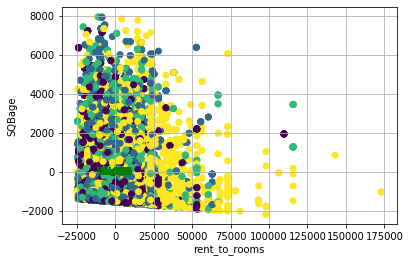

In [26]:
x_new = pca_ind.transform(X_train)   

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y_train) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlabel("rent_to_rooms")
plt.ylabel("SQBage")
plt.grid()

#Call the function. 
myplot(x_new[:,0:2], pca.components_) 
plt.show()


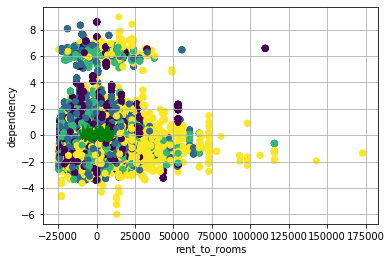

In [30]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,7]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y_train) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlabel("rent_to_rooms")
plt.ylabel("dependency")
plt.grid()

#Call the function. 
myplot(x_new[:,0:10], pca.components_) 
plt.show()

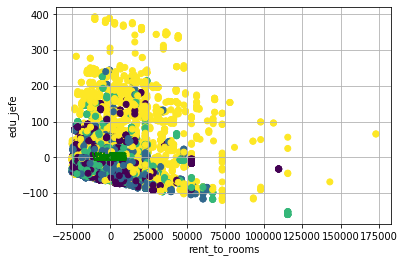

In [29]:

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,2]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y_train) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlabel("rent_to_rooms")
plt.ylabel("edu_jefe")
plt.grid()

#Call the function. 
myplot(x_new[:,0:3], pca.components_) 
plt.show()

In [32]:
def prepare_pca(n_components, data, y_train):
    matrix = PCA(n_components=10, svd_solver="full").fit_transform(data, y_train)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:data.keys()[i] for i in range(n_components)}, axis=1, inplace=True)
        
    return df_matrix
pca_df = prepare_pca(10, X_train[df_columns_importance[1][:10]], y_train)
pca_df.head()

rent_to_rooms       SQBage   edu_jefe     edjefe  SQBhogar_total  \
0     148.669471    55.069091 -21.600737  32.208255       16.907852   
1   -5567.061068  -137.136965 -31.979049 -23.750562       17.837471   
2     495.036078 -1538.164407 -43.180297  25.033063      -20.689994   
3   18111.383276  -825.271993 -32.214424  26.582792      -15.288181   
4    6328.316324 -1577.988388  46.977682  22.420604       19.333818   

   tech_hogar     edjefa  dependency  tech_individuo  pisomoscer  
0   69.178161   6.847568   -0.173906        2.410661    0.642568  
1  -14.971523   7.453188    0.829821       -0.185696   -0.571241  
2   -2.968352   6.178855    1.001749        0.074316    0.418867  
3    2.289202  10.145384    0.897100        0.424764    0.585024  
4  -16.203421  12.425404    4.751884        0.385092   -0.506265

In [33]:
pca_df.index = y_train.index
pca_df["train"] = y_train

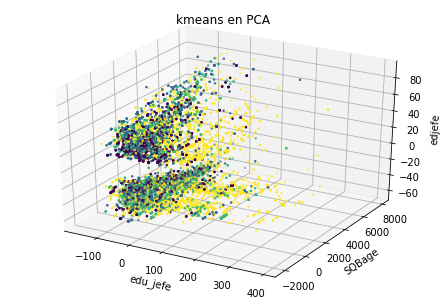

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_df.edu_jefe, pca_df.SQBage, pca_df.edjefe,c=y_train,label=y_train, s=2)
ax.set_xlabel('edu_jefe')
ax.set_ylabel('SQBage')
ax.set_zlabel('edjefe')
plt.title('kmeans en PCA')
plt.show()


In [35]:
graph_df = pca_df
fig = px.scatter_3d(pca_df, x='rent_to_rooms', y='SQBage', z='edu_jefe', color="train", size_max=10,
              opacity=0.8)
fig.show()

Para empezar me parecio muy interesante las columnas donde PCA encontro mayor relación, principalmente rent_to_rooms la cual no me imagine que fuera a ser tan importante. 

Lo otro bastante interesante es el tema el ruido o la dispersión que hay entre las diferentes clases principalmente entre la clase 1 y 3 que hacen bastante complicado de separar o encontrar un area de separación entre ellas. 

## Factor Analysis

**Bartlett’s test** de esfericidad verifica si las variables observadas se correlacionan o no utilizando la matriz de correlación observada contra la matriz de identidad. Si la prueba resulta estadísticamente insignificante, no debe emplear un análisis factorial.

En esta prueba de Bartlett, el valor p es 0. La prueba fue estadísticamente significativa, lo que indica que la matriz de correlación observada no es una matriz de identidad.


In [41]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#chi_square_value,p_value=calculate_bartlett_sphericity(pca_df.drop(columns=["train"])) 
#chi_square_value,p_value=calculate_bartlett_sphericity(X_train) 
chi_square_value,p_value=calculate_bartlett_sphericity(_ds_individuo)
chi_square_value, p_value

(nan, nan)

La prueba de **Kaiser-Meyer-Olkin (KMO)** mide la idoneidad de los datos para el análisis factorial. Determina la adecuación para cada variable observada y para el modelo completo. KMO estima la proporción de varianza entre todas las variables observadas. Identificación de menor proporción más adecuada para el análisis factorial. Los valores de KMO oscilan entre 0 y 1. El valor de KMO menor que 0.6 se considera inadecuado.

**Conclusion**

En el momento que me dio algun valor, el valor que me dio fue menor a 0.6 con lo cual el analisis no tendria ningun sentido. 

Lo hice solo para ver que valores data y ver un poco como funciona



In [44]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(pca_df.drop(columns=["train"]))
kmo_model

0.5403511620873958

In [45]:
fa = FactorAnalyzer()
fa.analyze(_ds_individuo,25, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

Original_Eigenvalues
0            1.092916e+01
1            8.628126e+00
2            5.287554e+00
3            4.191119e+00
4            3.662211e+00
5            3.430039e+00
6            3.172900e+00
7            2.996772e+00
8            2.804514e+00
9            2.600012e+00
10           2.390496e+00
11           2.278050e+00
12           2.202288e+00
13           2.141513e+00
14           2.000170e+00
15           1.767895e+00
16           1.741798e+00
17           1.704749e+00
18           1.645190e+00
19           1.578568e+00
20           1.555757e+00
21           1.542353e+00
22           1.497497e+00
23           1.494689e+00
24           1.435842e+00
25           1.392301e+00
26           1.353154e+00
27           1.324056e+00
28           1.312131e+00
29           1.290258e+00
30           1.222810e+00
31           1.214553e+00
32           1.200955e+00
33           1.188588e+00
34           1.176701e+00
35           1.142445e+00
36           1.134488e+00
37           1.122263e+00
38           1.106119e+00
39           1.100438e+00
40           1.071638e+00
41           1.063178e+00
42           1.052282e+00
43           1.041829e+00
44           1.038378e+00
45           1.024980e+00
46           1.008598e+00
47           1.006244e+00
48           1.000910e+00
49           9.931216e-01
50           9.889157e-01
51           9.791399e-01
52           9.671919e-01
53           9.652296e-01
54           9.588641e-01
55           9.472854e-01
56           9.379847e-01
57           9.294275e-01
58           9.116117e-01
59           9.042488e-01
60           8.928703e-01
61           8.730709e-01
62           8.654756e-01
63           8.530612e-01
64           8.445179e-01
65           8.272117e-01
66           8.055521e-01
67           8.028859e-01
68           7.777712e-01
69           7.573125e-01
70           7.532058e-01
71           7.161121e-01
72           6.959140e-01
73           6.923167e-01
74           6.876017e-01
75           6.664568e-01
76           6.492062e-01
77           6.306680e-01
78           6.228403e-01
79           6.144174e-01
80           5.744607e-01
81           5.591771e-01
82           5.367183e-01
83           5.098807e-01
84           5.010362e-01
85           4.892198e-01
86           4.590218e-01
87           4.327874e-01
88           4.121159e-01
89           3.907287e-01
90           3.643194e-01
91           3.299851e-01
92           3.264908e-01
93           2.902233e-01
94           2.840205e-01
95           2.825235e-01
96           2.416599e-01
97           2.053939e-01
98           1.899859e-01
99           1.439566e-01
100          1.199395e-01
101          1.147153e-01
102          8.780273e-02
103          7.768970e-02
104          5.986296e-02
105          4.473028e-02
106          4.003156e-02
107          3.203483e-02
108          2.975868e-02
109          2.334617e-02
110          2.177827e-02
111          2.024765e-02
112          1.289666e-02
113          9.738287e-03
114          1.405067e-03
115          1.973425e-04
116          7.114356e-05
117          5.335776e-13
118          3.533560e-13
119          2.640610e-13
120          2.536183e-13
121          2.210298e-13
122          1.509001e-13
123          1.165758e-13
124          6.920807e-14
125          8.980101e-15
126          1.514800e-17
127          5.541022e-18
128         -4.270558e-17
129         -8.000687e-14
130         -1.203953e-13
131         -1.246965e-13
132         -2.239761e-13
133         -2.409901e-13
134         -3.610681e-13
135         -4.492148e-13

In [127]:
ev[ev.Original_Eigenvalues > 1]

Original_Eigenvalues
0              10.929161
1               8.628126
2               5.287554
3               4.191119
4               3.662211
5               3.430039
6               3.172900
7               2.996772
8               2.804514
9               2.600012
10              2.390496
11              2.278050
12              2.202288
13              2.141513
14              2.000170
15              1.767895
16              1.741798
17              1.704749
18              1.645190
19              1.578568
20              1.555757
21              1.542353
22              1.497497
23              1.494689
24              1.435842
25              1.392301
26              1.353154
27              1.324056
28              1.312131
29              1.290258
30              1.222810
31              1.214553
32              1.200955
33              1.188588
34              1.176701
35              1.142445
36              1.134488
37              1.122263
38              1.106119
39              1.100438
40              1.071638
41              1.063178
42              1.052282
43              1.041829
44              1.038378
45              1.024980
46              1.008598
47              1.006244
48              1.000910

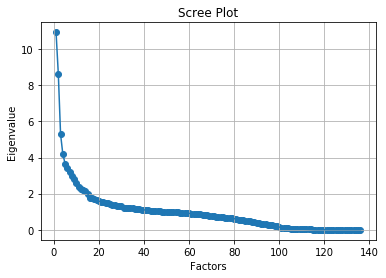

In [129]:
plt.scatter(range(1,_ds_individuo.shape[1]+1),ev)
plt.plot(range(1,_ds_individuo.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Performing Factor Analysis


In [46]:
fa = FactorAnalyzer()
fa.analyze(_ds_individuo, 15, rotation="varimax")

In [53]:
fa.loadings.sort_values("Factor7")


Factor1   Factor2   Factor3   Factor4   Factor5  \
abastaguadentro          0.088351 -0.005334  0.002869  0.026401  0.116451   
elimbasu1               -0.221033 -0.036072  0.006684 -0.068517 -0.085305   
zona_urbana             -0.171731  0.010081  0.005714 -0.003043  0.091206   
refrig                   0.054488 -0.066087  0.018167  0.005733 -0.148981   
paredblolad              0.136595 -0.097019  0.080574  0.099612 -0.284525   
pisomoscer               0.159098 -0.122902  0.049227  0.138361 -0.379982   
cielorazo                0.131969 -0.127914  0.054922  0.138800 -0.327361   
sanitario3               0.169820 -0.040522  0.021904  0.059979 -0.140251   
tipovivi3               -0.114443  0.163729 -0.014713 -0.247925 -0.064650   
energcocinar3           -0.052668  0.013483 -0.011244 -0.036354 -0.019037   
monthly_rent_log         0.232543 -0.044938  0.058850  0.198264 -0.245743   
eviv3                    0.060213 -0.045879  0.000006 -0.005547 -0.353264   
rent_to_rooms            0.246086 -0.043314  0.061576  0.135313 -0.096938   
region_central           0.027031 -0.022003  0.008672  0.056501 -0.011003   
television               0.023611 -0.078964 -0.013772  0.022235 -0.043244   
monthly_rent             0.245861 -0.067326  0.058472  0.176136 -0.234914   
epared3                 -0.029051 -0.113248  0.015568 -0.026386 -0.301110   
etecho3                 -0.036596 -0.004810 -0.017369 -0.075824 -0.309275   
v14a                    -0.001490 -0.031608  0.009156  0.018523 -0.109944   
edu_jefe                 0.038724 -0.079233  0.053490 -0.165834 -0.149569   
qmobilephone            -0.018025  0.192597 -0.059834 -0.166262 -0.069444   
Target                   0.112437 -0.263838 -0.054929 -0.005207 -0.163288   
hogar_adul               0.261303  0.151505 -0.073129  0.249835  0.021562   
region_pacifico_central -0.060024 -0.016091  0.009854 -0.045133  0.031399   
hacdor                   0.072002  0.544210  0.042689 -0.005106  0.220355   
escolari                 0.047245 -0.181398  0.053989 -0.081731 -0.100557   
mobilephone             -0.005536  0.018572 -0.012825 -0.237189 -0.047165   
work                     0.143016  0.187185 -0.052368 -0.166931  0.021229   
tech_hogar               0.006101  0.121913 -0.052289 -0.043722 -0.035234   
r4m2                    -0.092584  0.433243  0.329650  0.103698 -0.038896   
tech_individuo          -0.004086 -0.019082  0.001813 -0.067812 -0.048548   
public                   0.049417  0.033343 -0.008015 -0.022407  0.041530   
energcocinar2            0.027704 -0.022307  0.036393 -0.032862 -0.066340   
parentesco6             -0.030598  0.158776  0.041536  0.027689  0.011788   
v18q                    -0.001153 -0.021770  0.004426 -0.017734 -0.041784   
overcrowding             0.133552  0.720988  0.016963 -0.177255  0.202096   
estadocivil3             0.322324 -0.107534 -0.055318  0.131766 -0.085802   
instlevel5              -0.005902 -0.038234  0.037160 -0.040360 -0.073739   
paredpreb               -0.168142 -0.009506 -0.010987 -0.093911 -0.037857   
tipovivi2               -0.033817 -0.063983  0.013074 -0.132269 -0.090407   
female_weight           -0.335755 -0.021512  0.596870  0.167038 -0.044864   
instlevel8               0.070911 -0.143547  0.052014 -0.030315 -0.053266   
instlevel7               0.002282 -0.053373  0.014705 -0.012963 -0.013926   
instlevel4              -0.038618  0.019327 -0.003829 -0.105696  0.016491   
v18q1                    0.010475  0.003556 -0.015314 -0.018973 -0.012658   
estadocivil1             0.005994  0.178254  0.048817 -0.243230 -0.015000   
region_chorotega         0.019667  0.004218 -0.028718  0.020677 -0.018692   
edjefa                  -0.573403  0.014625  0.245154  0.272145  0.069254   
pisocemento             -0.203701  0.060605 -0.046246 -0.121700  0.200942   
techocane                0.020596  0.037178  0.002660  0.005508  0.052006   
techoentrepiso           0.005718 -0.023231  0.017994 -0.041660 -0.063892   
paredother            

AL hacer el analisis de factor reduje el numeros de factores a 15, porque el numero original que me da era mayor a 48, con lo cual me parecio demasiado factores, decidi dejarlo son el analisis de 15 factores de los cuales:

1. Factor 1. Para el facotr 1 seria edje, edja que obviamente tienen gran relación a la inversa. 
2. Factor 2 si es mas claro y tienen mucha relación, no_work, hogar_nin, tam_hog, SQBhogar_total, tam_viv, overcrowding, room_per_person, child_dependency. Estos valores al final son relativos al sobrepoblación en una casa y donde la mayoria son niños.
3. Factor 3. De las que tienen más relación seria female_weight, female y al otro lado de la relación male y male_weight
4. Factor 4. age, hogar_mayor, dependency
5. Factor 5. etecho1, eviv1, epared1
6. Factor 6. etecho3, eviv3, epared3
7. Factor 7. energcocinar4, paredmad, zona_rural, santiario5, abastaguaguera
8. Factor 8, escolari, estadocivil7
9. Factor 9, tech_individuo, v18q, v18q1, tech_hogar

De estos factores me parecio interesante la relación entre ellos y la relación con los valores opuesto, que ayuda bastant a ver o descubrir nuevas relaciones que quizas uno no tenia en mente

In [136]:
fa.get_factor_variance()


Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  \
SS Loadings     2.365262  7.307298  2.904507  3.578340  3.655839  4.027849   
Proportion Var  0.017392  0.053730  0.021357  0.026311  0.026881  0.029617   
Cumulative Var  0.017392  0.071122  0.092478  0.118790  0.145671  0.175287   

                 Factor7   Factor8   Factor9  Factor10  Factor11  Factor12  \
SS Loadings     3.369503  2.795779  3.804212  4.655655  2.613094  1.875495   
Proportion Var  0.024776  0.020557  0.027972  0.034233  0.019214  0.013790   
Cumulative Var  0.200063  0.220620  0.248593  0.282825  0.302039  0.315830   

                Factor13  Factor14  Factor15  
SS Loadings     2.846204  4.024312  2.511860  
Proportion Var  0.020928  0.029591  0.018470  
Cumulative Var  0.336758  0.366348  0.384818

Con 15 Factores notamos una explicación de la variación acumulativa de 38%

In [137]:
fa = FactorAnalyzer()
fa.analyze(_ds_individuo, 10, rotation="varimax")

In [138]:
fa.get_factor_variance()


Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  \
SS Loadings     4.953957  7.502298  4.446623  4.569043  3.694668  4.125342   
Proportion Var  0.036426  0.055164  0.032696  0.033596  0.027167  0.030333   
Cumulative Var  0.036426  0.091590  0.124286  0.157882  0.185048  0.215382   

                 Factor7   Factor8   Factor9  Factor10  
SS Loadings     3.312649  3.150074  3.679603  3.342338  
Proportion Var  0.024358  0.023162  0.027056  0.024576  
Cumulative Var  0.239740  0.262902  0.289958  0.314534

Con 10 Factores notamos una explicación de la variación acumulativa de 31%


Si se animan, pueden usar una red neuronal como encoder para la reducción de dimensionalidad.

***Hint: *** [En el siguiente link](https://medium.com/intuitive-deep-learning/autoencoders-neural-networks-for-unsupervised-learning-83af5f092f0b)

### 2.  K-Means Clustering

A continuación se aplicará K-Means para clasificar en clusters nuestros datasets.

In [79]:
from collections import Counter


### K-medias con x_train de individuo

In [165]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, n_jobs=-1, random_state=22)
kmeans.fit(X_train)
print(kmeans)
print('Suma de los cuadrados de las distancias al clusters / Inertia: ', kmeans.inertia_)
print('silhouette_score: {}'.format(silhouette_score(X_train, kmeans.labels_, metric='euclidean')))
print('cantidad de datos por cluster con kmedias: ',Counter(kmeans.labels_))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)
Suma de los cuadrados de las distancias al clusters / Inertia:  722731199110.8041
silhouette_score: 0.5439909323889002
cantidad de datos por cluster con kmedias:  Counter({0: 9012, 1: 5521, 3: 3934, 2: 582})


### K-medias con PCA de individuo

In [163]:
num_clusters = 4
kmeans_pca = KMeans(n_clusters=num_clusters, n_jobs=-1, random_state=22)
kmeans_pca.fit(pca_df.drop(columns=["train"]))
print(kmeans_pca)
print('Suma de los cuadrados de las distancias al clusters / Inertia: ', kmeans_pca.inertia_)
print('silhouette_score: {}'.format(silhouette_score(pca_df.drop(columns=["train"]), kmeans_pca.labels_, metric='euclidean')))
print('cantidad de datos por cluster con kmedias: ',Counter(kmeans_pca.labels_))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)
Suma de los cuadrados de las distancias al clusters / Inertia:  722730962509.9957
silhouette_score: 0.5439911862644735
cantidad de datos por cluster con kmedias:  Counter({0: 9012, 1: 5521, 3: 3934, 2: 582})


In [167]:
num_clusters = 5
kmeans_pca = KMeans(n_clusters=num_clusters, n_jobs=-1, random_state=22)
kmeans_pca.fit(pca_df.drop(columns=["train"]))
print(kmeans_pca)
print('Suma de los cuadrados de las distancias al clusters / Inertia: ', kmeans_pca.inertia_)
print('silhouette_score: {}'.format(silhouette_score(pca_df.drop(columns=["train"]), kmeans_pca.labels_, metric='euclidean')))
print('cantidad de datos por cluster con kmedias: ',Counter(kmeans_pca.labels_))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)
Suma de los cuadrados de las distancias al clusters / Inertia:  550372203013.3341
silhouette_score: 0.4953154375871708
cantidad de datos por cluster con kmedias:  Counter({4: 5655, 2: 4677, 0: 4201, 1: 3934, 3: 582})


In [83]:
from sklearn.metrics import silhouette_score as sc
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import sklearn
def cv_silhouette_scorer(estimator, X):
    estimator.fit(X)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return sc(X, cluster_labels)

param_dict = {
    'max_iter': [200, 300],  
    'tol': [0.005, 0.002, 0.001, 0.0001, 0.00001],
    'n_clusters':[4,5,6,7],
}

cv = [(slice(None), slice(None))]
gs = GridSearchCV(estimator=KMeans(n_jobs=-1, random_state=22), param_grid=param_dict, 
                  scoring=cv_silhouette_scorer, cv=ShuffleSplit(test_size=0.01, n_splits=1), n_jobs=-1)
gs.fit(pca_df.drop(columns=["train"]))

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=None, test_size=0.01, train_size=None),
             error_score='raise-deprecating',
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=8, n_init=10, n_jobs=-1,
                              precompute_distances='auto', random_state=22,
                              tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'max_iter': [200, 300], 'n_clusters': [4, 5, 6, 7],
                         'tol': [0.005, 0.002, 0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=<function cv_silhouette_scorer at 0x7fe398c06840>,
             verbose=0)

In [126]:
print("Mejor conjunto de parámetros:")
print(gs.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("Exactitud: %0.5f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))

Mejor conjunto de parámetros:
{'max_iter': 200, 'tol': 0.005}

Puntajes de la grilla:

Exactitud: 0.50516 (+/-0.000) para los parámetros {'max_iter': 200, 'tol': 0.005}
Exactitud: 0.50516 (+/-0.000) para los parámetros {'max_iter': 200, 'n_clusters': 4, 'tol': 0.002}
Exactitud: 0.50516 (+/-0.000) para los parámetros {'max_iter': 200, 'n_clusters': 4, 'tol': 0.001}
Exactitud: 0.50516 (+/-0.000) para los parámetros {'max_iter': 200, 'n_clusters': 4, 'tol': 0.0001}
Exactitud: 0.50516 (+/-0.000) para los parámetros {'max_iter': 200, 'n_clusters': 4, 'tol': 1e-05}
Exactitud: 0.49124 (+/-0.000) para los parámetros {'max_iter': 200, 'n_clusters': 5, 'tol': 0.005}
Exactitud: 0.49232 (+/-0.000) para los parámetros {'max_iter': 200, 'n_clusters': 5, 'tol': 0.002}
Exactitud: 0.49460 (+/-0.000) para los parámetros {'max_iter': 200, 'n_clusters': 5, 'tol': 0.001}
Exactitud: 0.49460 (+/-0.000) para los parámetros {'max_iter': 200, 'n_clusters': 5, 'tol': 0.0001}
Exactitud: 0.49460 (+/-0.000) para lo

### DBSCAN con PCA de individuo

In [149]:
db = DBSCAN(eps=0.2, min_samples=10).fit(pca_df.drop(columns=["train"]))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_train, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pca_df.drop(columns=["train"]),labels))


Estimated number of clusters: 113
Estimated number of noise points: 17796
Homogeneity: 0.068
Completeness: 0.172
V-measure: 0.098
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.088
Silhouette Coefficient: -0.814


In [151]:
min_samples = pca_df.drop(columns=["train"]).shape[1]+1 #  Rule of thumb; number of dimensions D in the data set, as minPts ≥ D + 1
print(min_samples)

db = DBSCAN(eps=0.4, min_samples=min_samples).fit(pca_df.drop(columns=["train"]))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_train, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pca_df.drop(columns=["train"]),labels))

12
Estimated number of clusters: 33
Estimated number of noise points: 18617
Homogeneity: 0.023
Completeness: 0.168
V-measure: 0.040
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.036
Silhouette Coefficient: -0.839


In [63]:
from sklearn.manifold import TSNE
def prepare_tsne(n_components, data):
    names = ['x', 'y', 'z']
    matrix = TSNE(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
        
    return df_matrix

In [177]:
names = ['x', 'y', 'z']
matrix = TSNE(n_components=3).fit_transform(pca_df.drop(columns=["train"]))
df_matrix = pd.DataFrame(matrix)
df_matrix.rename({i:names[i] for i in range(3)}, axis=1, inplace=True)

NameError: name 'n_components' is not defined

In [180]:
df_matrix = pca_df.copy()
df_matrix['x'] = matrix[:,0]
df_matrix['y'] = matrix[:,1] 
df_matrix['z'] = matrix[:,2]

In [181]:
fig = px.scatter_3d(df_matrix, x="x", y='y', z='z', color="train", size_max=10,
              opacity=0.8)
fig.show()

## Meanshift

In [79]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth=2).fit(pca_df.drop(columns=["train"]))
clustering.labels_

array([1012, 1654, 1563, ..., 4894, 1299,  244])

In [80]:
pca_df.shape

(19049, 11)

In [81]:
len(clustering.labels_)

19049

### El mejor modelo seleccionado es Kmeans

DB scan 
Los parametros vienen de los mejores parametros de gridsearch. 

**De aqui en adelante uso el dataset resultante del PCA para todos los analisis**, porque al usar PCA da mejor las metricas de los clusteres.

**K-medias con Distancia del coseno**

In [85]:
best_params = gs.best_params_
best_params.pop("n_clusters")

4

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

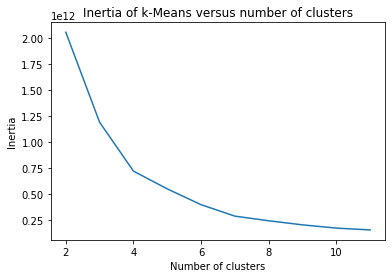

In [89]:
scores = [KMeans(n_clusters=i+2,random_state=22, **best_params).fit(pca_df.drop(columns=["train"])).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

**K-medias con Distancia del coseno (normalizar los vectores)**

Text(0.5, 1.0, 'Inertia of Cosine k-Means versus number of clusters')

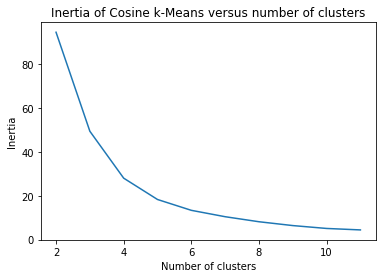

In [90]:
normalized_vectors = preprocessing.normalize(X_train)
scores = [KMeans(n_clusters=i+2,random_state=22, **best_params).fit(normalized_vectors).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

### Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?

Pareceria que el punto de inflexión esta en 4 clusteres.

### Agregar a los dataset originales el cluster resultante de los modelos.


In [112]:
pca_df["cluster"] = gs.best_estimator_.labels_
pca_df.head()

rent_to_rooms       SQBage   edu_jefe     edjefe  SQBhogar_total  \
1232     148.669471    55.069091 -21.600737  32.208255       16.907852   
9282   -5567.061068  -137.136965 -31.979049 -23.750562       17.837471   
827      495.036078 -1538.164407 -43.180297  25.033063      -20.689994   
9492   18111.383276  -825.271993 -32.214424  26.582792      -15.288181   
6711    6328.316324 -1577.988388  46.977682  22.420604       19.333818   

      tech_hogar     edjefa  dependency  tech_individuo  pisomoscer  train  \
1232   69.178161   6.847568   -0.173906        2.410661    0.642568      2   
9282  -14.971523   7.453188    0.829821       -0.185696   -0.571241      3   
827    -2.968352   6.178855    1.001749        0.074316    0.418867      1   
9492    2.289202  10.145384    0.897100        0.424764    0.585024      2   
6711  -16.203421  12.425404    4.751884        0.385092   -0.506265      1   

      cluster  
1232        1  
9282        0  
827         1  
9492        3  
6711        1

In [116]:
pca_df["cluster"] = pca_df["cluster"].apply(lambda x: x+1)

### Graficar diferentes variables de interés por cluster y por clase, y compararlos.


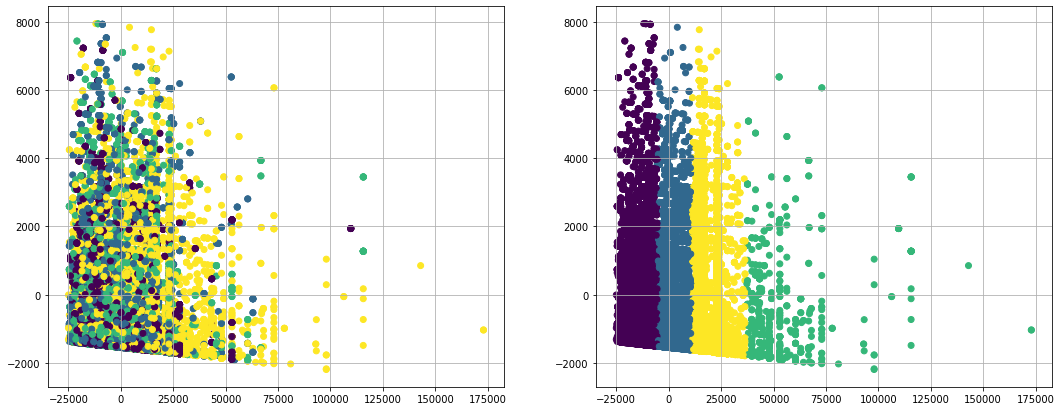

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.grid()
ax1.scatter(pca_df.rent_to_rooms,pca_df.SQBage, c = y_train)

ax2.grid()
ax2.scatter(pca_df.rent_to_rooms,pca_df.SQBage, c = pca_df.cluster)

plt.show()

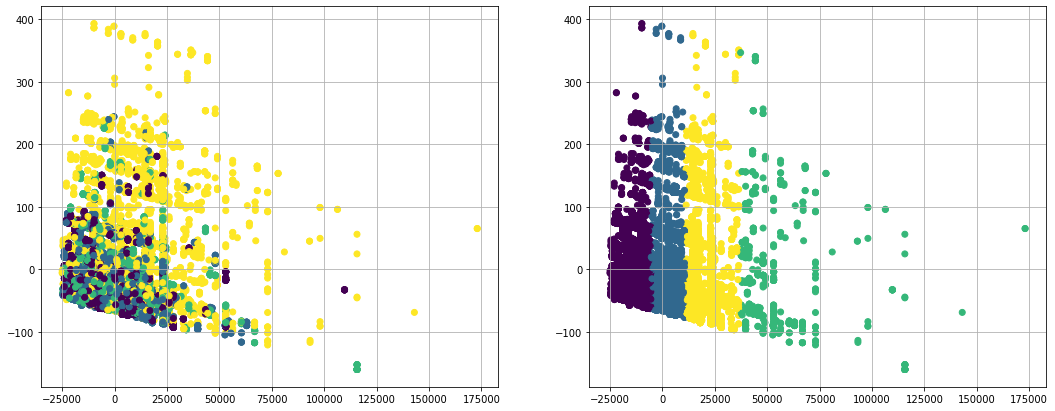

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.grid()
ax1.scatter(pca_df.rent_to_rooms,pca_df.edu_jefe, c = y_train)

ax2.grid()
ax2.scatter(pca_df.rent_to_rooms,pca_df.edu_jefe, c = pca_df.cluster)

plt.show()

### Tomar ejemplos aleatorios y pensar por qué están en un cluster y no en otro.


### Calcular los centroides y tratar de mostrar qué tiene cada cluster cerca de su centroide. Obtener conclusiones.

In [94]:
centroids = gs.best_estimator_.cluster_centers_   # centroids = km.centroids
order_centroids = centroids.argsort()[:, ::-1]

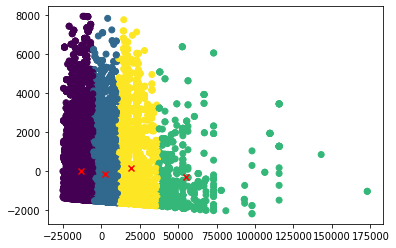

In [95]:
plt.scatter(pca_df.rent_to_rooms,pca_df.SQBage, c = pca_df.cluster)

plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r')
plt.show()

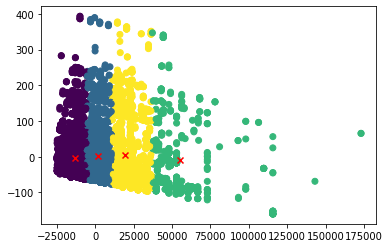

In [248]:
plt.scatter(pca_df.rent_to_rooms,pca_df.edu_jefe, c = pca_df.cluster)

plt.scatter(centroids[:,0], centroids[:,2], marker="x", color='r')
plt.show()

### Contrastar la clasificación en clusters con las etiquetas de clases, tanto gráficamente como analítica. Si utilizan 4 clusters, elaborar una matriz de confusión.

In [124]:
pca_df.cluster.value_counts()

1    9012
2    5521
4    3934
3     582
Name: cluster, dtype: int64

In [129]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, pca_df.cluster))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, pca_df.cluster))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, pca_df.cluster))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_train, pca_df.cluster))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train, pca_df.cluster,
                                           average_method='arithmetic'))

Homogeneity: 0.023
Completeness: 0.028
V-measure: 0.025
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.025


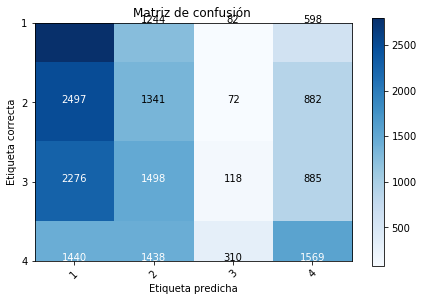

In [120]:
from ml.visualization import plot_confusion_matrix, plot_learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc


plot_confusion_matrix(confusion_matrix(y_train, pca_df.cluster),classes=( 1, 2, 3, 4),title="Matriz de confusión ")

In [119]:
confusion_matrix(y_train, pca_df.cluster)

array([[2799, 1244,   82,  598],
       [2497, 1341,   72,  882],
       [2276, 1498,  118,  885],
       [1440, 1438,  310, 1569]])

### Pruebas extras

For n_clusters = 3 The average silhouette_score is : 0.5955911328757262
For n_clusters = 4 The average silhouette_score is : 0.5375691394792536
For n_clusters = 5 The average silhouette_score is : 0.4863186413514929
For n_clusters = 6 The average silhouette_score is : 0.4988618118819055


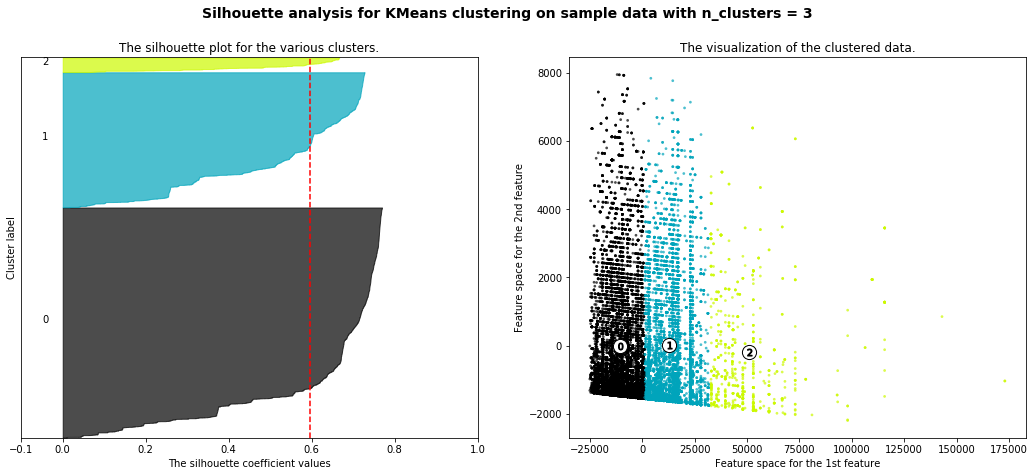

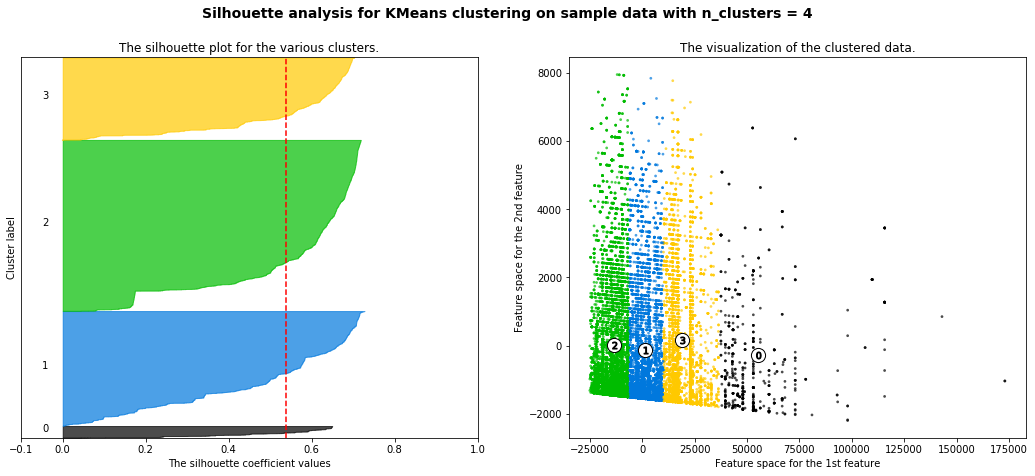

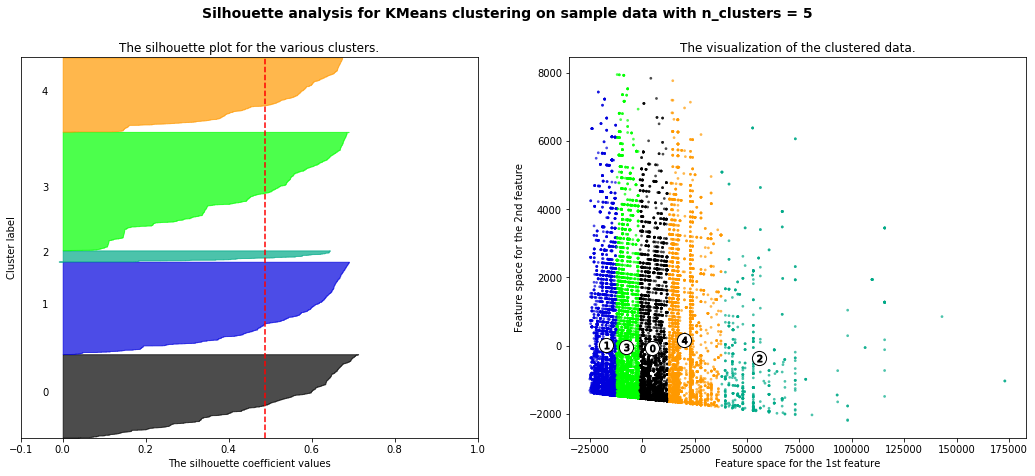

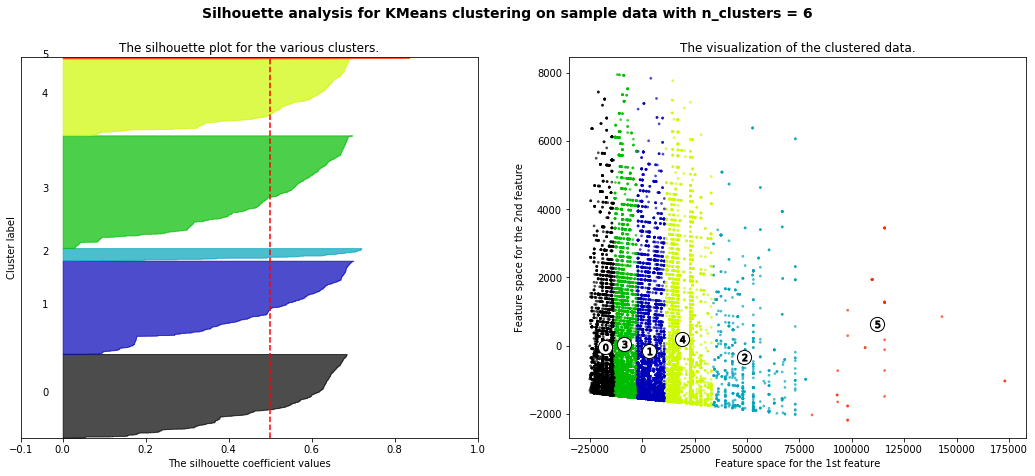

In [123]:
import matplotlib.cm as cm

n = 7
sum_sq_dist = []
list_k = list(range(3, n))

for n_clusters in list_k:
    km = KMeans(n_clusters=n_clusters)
    km.fit(x_new)
    sum_sq_dist.append(km.inertia_)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_new) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_new, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_new, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_new[:, 0], x_new[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
    
plt.show()
